<a href="https://colab.research.google.com/github/Skander28/Task2/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks foundation data science intern

## Task2: Predict the optimum number of clusters Using Unsupervised ML(K-means)

## Author:Laribi Skander




### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
ir_df = pd.DataFrame(iris.data, columns = iris.feature_names)
ir_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
ir_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Visualization**

Text(0, 0.5, 'sepal width ')

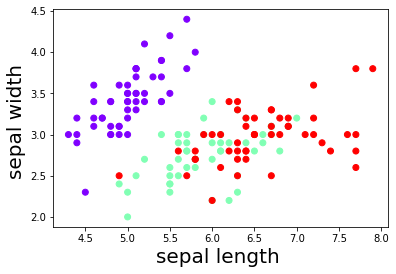

In [5]:
plt.scatter(ir_df['sepal length (cm)'], ir_df['sepal width (cm)'] ,c=iris.target,cmap='rainbow')

plt.xlabel('sepal length ', fontsize=20)
plt.ylabel('sepal width ', fontsize=20)

### **Find The Optimum Number Of Clusters for K-Means classification using elbow method**

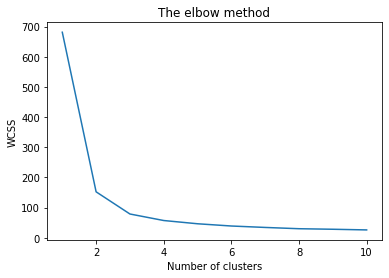

In [7]:
# Finding the optimum number of clusters for k-means classification

x = ir_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### **Applying Kmeans**

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(ir_df.values)

### **Visualization of the clusters**

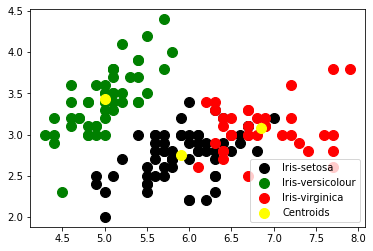

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y  == 2, 0], x[y  == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()